<a href="https://colab.research.google.com/github/nellaadrs/skripsi/blob/main/1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

###dataset

In [ ]:
#Membaca dataset
import pandas as pd
dataset = pd.read_csv ("/content/drive/MyDrive/tiroid.csv", sep=";")
dataset.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,FT4,T4_measured,T4,FTI_measured,FTI,TBG_measured,TBG,referral_source,patient_id,target
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,840801013,-
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,840801014,-
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,840801042,-
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,840803046,-
4,60,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,840803048,-


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7530 entries, 0 to 7529
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  7530 non-null   int64  
 1   sex                  7280 non-null   object 
 2   on_thyroxine         7530 non-null   object 
 3   query_on_thyroxine   7530 non-null   object 
 4   on_antithyroid_meds  7530 non-null   object 
 5   sick                 7530 non-null   object 
 6   pregnant             7530 non-null   object 
 7   thyroid_surgery      7530 non-null   object 
 8   I131_treatment       7530 non-null   object 
 9   query_hypothyroid    7530 non-null   object 
 10  query_hyperthyroid   7530 non-null   object 
 11  lithium              7530 non-null   object 
 12  goitre               7530 non-null   object 
 13  tumor                7530 non-null   object 
 14  hypopituitary        7530 non-null   object 
 15  psych                7530 non-null   o

In [ ]:
dataset.isnull().sum()

,0
age,0
sex,250
on_thyroxine,0
query_on_thyroxine,0
on_antithyroid_meds,0
sick,0
pregnant,0
thyroid_surgery,0
I131_treatment,0
query_hypothyroid,0


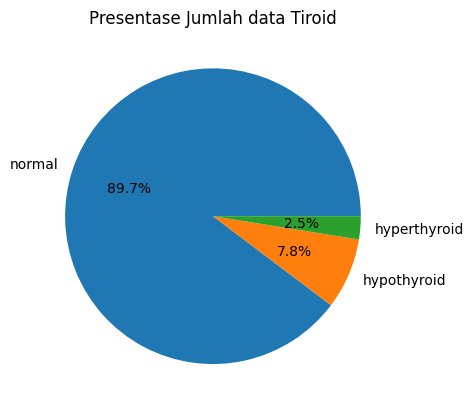

In [ ]:
import matplotlib.pyplot as plt
labels = ["normal","hypothyroid","hyperthyroid"]
quantity = dataset["target"].value_counts().values
plt.pie(quantity, labels=labels, autopct='%1.1f%%')
plt.title('Presentase Jumlah data Tiroid')
plt.show()
colors = ['green', 'blue', 'orange']

In [ ]:
import pandas as pd

# Downcast numerik
def downcast_numeric(df):
    for col in df.select_dtypes(include=['float64']).columns:
        df[col] = pd.to_numeric(df[col], downcast='float')
    for col in df.select_dtypes(include=['int64']).columns:
        df[col] = pd.to_numeric(df[col], downcast='integer')
    return df

# Konversi kolom kategorikal
def convert_to_category(df):
    for col in df.select_dtypes(include=['object']).columns:
        if df[col].nunique() / len(df[col]) < 0.5:  # Konversi jika kategori relatif kecil
            df[col] = df[col].astype('category')
    return df

# Load data (contoh, ganti dengan data asli Anda)
dataset = pd.read_csv('/content/drive/MyDrive/tiroid.csv',sep=";")

# Terapkan optimasi
dataset = downcast_numeric(dataset)
dataset = convert_to_category(dataset)

# Optimasi kolom boolean yang tidak terdeteksi otomatis
bool_columns = ['on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds', 'sick',
                'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid',
                'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary',
                'psych', 'TSH_measured', 'T3_measured', 'FT4_measured', 'T4_measured',
                'FTI_measured', 'TBG_measured']

for col in bool_columns:
    dataset[col] = dataset[col].astype('category')

# Tampilkan penggunaan memori sebelum dan sesudah
print("Penggunaan memori setelah optimasi:")
print(dataset.info(memory_usage='deep'))


Penggunaan memori setelah optimasi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7530 entries, 0 to 7529
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  7530 non-null   int8    
 1   sex                  7280 non-null   category
 2   on_thyroxine         7530 non-null   category
 3   query_on_thyroxine   7530 non-null   category
 4   on_antithyroid_meds  7530 non-null   category
 5   sick                 7530 non-null   category
 6   pregnant             7530 non-null   category
 7   thyroid_surgery      7530 non-null   category
 8   I131_treatment       7530 non-null   category
 9   query_hypothyroid    7530 non-null   category
 10  query_hyperthyroid   7530 non-null   category
 11  lithium              7530 non-null   category
 12  goitre               7530 non-null   category
 13  tumor                7530 non-null   category
 14  hypopituitary        7530 non-null  

###prepro

In [ ]:
#preprocessing encoding
from sklearn.preprocessing import LabelEncoder
kolom_enc = ["sex","on_thyroxine","query_on_thyroxine" ,"on_antithyroid_meds","sick","pregnant","thyroid_surgery","I131_treatment","query_hypothyroid","query_hyperthyroid","lithium","goitre","tumor","hypopituitary","psych","TSH_measured", "T3_measured","FT4_measured","T4_measured", "FTI_measured","TBG_measured","referral_source","target"]

encod = LabelEncoder()

for column in kolom_enc:
    dataset[column] = encod.fit_transform(dataset[column])
dataset.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,FT4,T4_measured,T4,FTI_measured,FTI,TBG_measured,TBG,referral_source,patient_id,target
0,29,0,0,0,0,0,0,0,0,1,...,NaN,0,NaN,0,NaN,0,NaN,5,840801013,0
1,29,0,0,0,0,0,0,0,0,0,...,128.0,0,NaN,0,NaN,0,NaN,5,840801014,0
2,41,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,0,NaN,1,11.0,5,840801042,0
3,36,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,0,NaN,1,26.0,5,840803046,0
4,60,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,0,NaN,1,26.0,5,840803048,0


In [ ]:
# #preprosecing missing value dengan imputasi knn
# from sklearn.impute import KNNImputer
# kolom = ["sex", "TSH", "T3", "FT4", "T4", "FTI", "TBG"]
# imputer = KNNImputer(n_neighbors=3)
# dataset[kolom] = imputer.fit_transform(dataset[kolom])
# dataset.head()

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np
kolom = ["sex", "TSH", "T3", "FT4", "T4", "FTI", "TBG"]
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
dataset[kolom] = imputer.fit_transform(dataset[kolom])
dataset.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,FT4,T4_measured,T4,FTI_measured,FTI,TBG_measured,TBG,referral_source,patient_id,target
0,29,0.0,0,0,0,0,0,0,0,1,...,105.249778,0,0.968085,0,110.565501,0,22.869729,5,840801013,0
1,29,0.0,0,0,0,0,0,0,0,0,...,128.000000,0,0.968085,0,110.565501,0,22.869729,5,840801014,0
2,41,0.0,0,0,0,0,0,0,0,0,...,105.249778,0,0.968085,0,110.565501,1,11.000000,5,840801042,0
3,36,0.0,0,0,0,0,0,0,0,0,...,105.249778,0,0.968085,0,110.565501,1,26.000000,5,840803046,0
4,60,0.0,0,0,0,0,0,0,0,0,...,105.249778,0,0.968085,0,110.565501,1,26.000000,5,840803048,0


In [ ]:
dataset.std()

,0
age,1.862593e+01
sex,5.502578e-01
on_thyroxine,3.161441e-01
query_on_thyroxine,1.267674e-01
on_antithyroid_meds,1.098641e-01
sick,1.885755e-01
pregnant,7.269504e-02
thyroid_surgery,1.178164e-01
I131_treatment,1.346148e-01
query_hypothyroid,2.485352e-01


In [ ]:
#preprocessing Normalisasi
from sklearn.preprocessing import MinMaxScaler
x = dataset.drop(["target"], axis=1)
y = dataset["target"]
scaler = MinMaxScaler()
data = scaler.fit_transform(x)
data = pd.DataFrame(data, columns=x.columns)
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,FT4_measured,FT4,T4_measured,T4,FTI_measured,FTI,TBG_measured,TBG,referral_source,patient_id
0,0.291667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.241238,0.0,0.403153,0.0,0.131689,0.0,0.507121,1.0,0.000000e+00
1,0.291667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.294393,0.0,0.403153,0.0,0.131689,0.0,0.507121,1.0,3.410871e-08
2,0.416667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.241238,0.0,0.403153,0.0,0.131689,1.0,0.242762,1.0,9.891527e-07
3,0.364583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.241238,0.0,0.403153,0.0,0.131689,1.0,0.576837,1.0,6.934301e-05
4,0.614583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.241238,0.0,0.403153,0.0,0.131689,1.0,0.576837,1.0,6.941123e-05


###SMOTE

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
X = data
y = dataset["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("Sebelum SMOTE:", Counter(y_train))
print("Sesudah SMOTE:", Counter(y_train_smote))

Sebelum SMOTE: Counter({0: 5404, 2: 468, 1: 152})
Sesudah SMOTE: Counter({0: 5404, 2: 5404, 1: 5404})


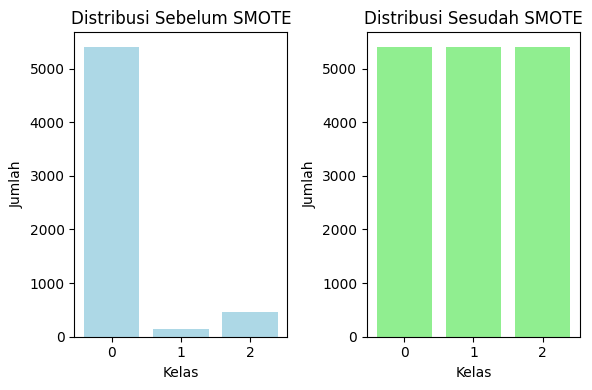

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(6, 4))
axes[0].bar(Counter(y_train).keys(), Counter(y_train).values(), color='lightblue')
axes[0].set_title('Distribusi Sebelum SMOTE')
axes[0].set_xlabel('Kelas')
axes[0].set_ylabel('Jumlah')

axes[1].bar(Counter(y_train_smote).keys(), Counter(y_train_smote).values(), color='lightgreen')
axes[1].set_title('Distribusi Sesudah SMOTE')
axes[1].set_xlabel('Kelas')
axes[1].set_ylabel('Jumlah')
plt.tight_layout()
plt.show()

###Seleksi IG

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import numpy as np
mutual_info = mutual_info_classif(X_train_smote, y_train_smote)
seleksi_ig = pd.DataFrame({"Fitur": X_train.columns, "Information Gain": mutual_info})
#fitur_penting = fitur_penting.sort_values(by="Information Gain", ascending=False).reset_index(drop=True)
seleksi_ig

,Fitur,Information Gain
0,age,0.457864
1,sex,0.039385
2,on_thyroxine,0.026955
3,query_on_thyroxine,0.005312
4,on_antithyroid_meds,0.010241
5,sick,0.011357
6,pregnant,0.006998
7,thyroid_surgery,0.008937
8,I131_treatment,0.000000
9,query_hypothyroid,0.026661


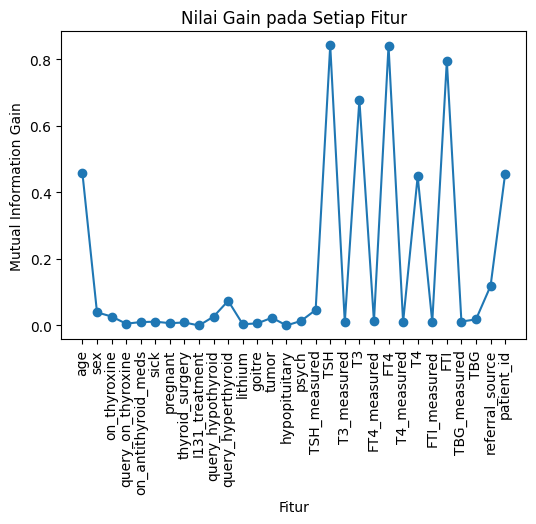

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(seleksi_ig["Fitur"], seleksi_ig["Information Gain"], marker='o')
plt.xlabel('Fitur')
plt.ylabel('Mutual Information Gain')
plt.title('Nilai Gain pada Setiap Fitur')
plt.xticks(rotation=90)
plt.show()

In [ ]:
threshold = seleksi_ig["Information Gain"].mean()
seleksi_fitur = seleksi_ig[seleksi_ig["Information Gain"] > threshold]
seleksi_fitur

,Fitur,Information Gain
0,age,0.457864
17,TSH,0.841242
19,T3,0.677664
21,FT4,0.840155
23,T4,0.448279
25,FTI,0.795048
29,patient_id,0.455611


In [ ]:
seleksi_fitur = seleksi_fitur["Fitur"]
data_ig = X_train_smote.loc[:, seleksi_fitur]
data_ig = pd.concat([data_ig, y_train_smote.reset_index(drop=True)], axis=1)
data_ig.head()


,age,TSH,T3,FT4,T4,FTI,patient_id,target
0,0.781250,0.001217,0.080780,0.254673,0.398964,0.138167,0.344635,0
1,0.781250,0.003443,0.075209,0.268692,0.424870,0.138167,0.003548,0
2,0.739583,0.009984,0.109599,0.247664,0.430052,0.126247,0.352243,0
3,0.406250,0.012632,0.109599,0.198598,0.352332,0.119095,0.662598,2
4,0.645833,0.009984,0.109599,0.240654,0.393782,0.132207,0.999590,0


In [ ]:
presentase =  ((len(dataset.columns)-len(data_ig.columns)) / len(dataset.columns))*100
print("Jumlah fitur sebelum seleksi fitur = ", len(dataset.columns) )
print("Jumlah fitur setelah seleksi fitur = ", len(data_ig.columns))
print(f"Presentase pengurangan fitur = {presentase:.2f}%")

Jumlah fitur sebelum seleksi fitur =  31
Jumlah fitur setelah seleksi fitur =  8
Presentase pengurangan fitur = 74.19%


###skenario

In [ ]:
#tanpa seleksi dan tanpa gs
import numpy as np
from scipy.spatial.distance import cdist
# from sklearn.decomposition import PCA
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score

class LSSVM(BaseEstimator, ClassifierMixin):
    def __init__(self, C=None, kernel=None, gamma=None):
        self.C = C
        self.kernel = kernel
        self.gamma = gamma
        self.models = {}

    @staticmethod
    def kernel_linear(xi, xj):
        return np.dot(xi, xj.T)

    @staticmethod
    def kernel_rbf(xi, xj, gamma):
        if xi.ndim == 1:
            xi = xi.reshape(1, -1)
        if xj.ndim == 1:
            xj = xj.reshape(1, -1)
        return np.exp(-gamma * cdist(xi, xj, 'sqeuclidean'))

    def fungsi_kernel(self):
        if self.kernel == "linear":
            return self.kernel_linear
        elif self.kernel == "rbf":
            return lambda xi, xj: self.kernel_rbf(xi, xj, self.gamma)

    def fit(self, X, y):
        # pca = PCA(n_components=30)  # Sesuaikan jumlah komponen
        # X = pca.fit_transform(X)
        self.classes = np.unique(y)
        self.kernel_fungsi = self.fungsi_kernel()

        for cls in self.classes:
            y_biner = np.where(y == cls, 1, -1).astype(np.float32)
            model = self.train_binary_lssvm(X, y_biner)
            self.models[cls] = model

    def train_binary_lssvm(self, X, y_biner):
        omega = self.kernel_fungsi(X, X).astype(np.float32)
        ones = np.ones((len(y_biner), 1), dtype=np.float32)
        alpha = np.block([[0, ones.T], [ones, omega + np.eye(len(y_biner), dtype=np.float32) / self.C]])
        b = np.concatenate(([0], y_biner))
        solusi = np.linalg.solve(alpha, b)
        intercept = solusi[0]
        koefisien = solusi[1:]
        return {"intercept": intercept, "koefisien": koefisien, "support_vector": X}

    def _prediksi(self, X):
        hasil_prediksi = []
        for cls, model in self.models.items():
            intercept = model["intercept"]
            koefisien = model["koefisien"]
            support_vector = model["support_vector"]
            hasil_kernel = self.kernel_fungsi(X, support_vector)
            prediksi = hasil_kernel @ koefisien + intercept
            hasil_prediksi.append(prediksi)
        hasil_prediksi = np.array(hasil_prediksi).T
        return self.classes[np.argmax(hasil_prediksi, axis=1)]


#####dengan seleksi fitur tanpa gs

In [ ]:
#dengan seleksi fitur tanpa gs
param_c = [0.1,10,100]
hasil_linear = []
for C in param_c:
    klasif = LSSVM(C=C, kernel="linear")
    klasif.fit(data_ig.drop(columns='target'), data_ig['target'])
    y_prediksi = klasif._prediksi(X_test[seleksi_fitur])
    akurasi = accuracy_score(y_test, y_prediksi)
    hasil_linear.append({"C": C, "akurasi": akurasi})

sort = sorted(hasil_linear, key=lambda x: x["akurasi"], reverse=True)
print("Hasil untuk Kernel Linear")
for hasil in sort:
    print(f"C = {hasil['C']}, akurasi = {hasil['akurasi']:.4f}")

# RBF
param_gamma = [1,100,1000]
hasil_rbf = []

for C in param_c:
    for gamma in param_gamma:
        klasif = LSSVM(C=C, kernel="rbf", gamma=gamma)
        klasif.fit(data_ig.drop(columns='target'), data_ig['target'])
        y_prediksi = klasif._prediksi(X_test[seleksi_fitur])
        akurasi = accuracy_score(y_test, y_prediksi)
        hasil_rbf.append({"C": C, "gamma": gamma, "akurasi": akurasi})

sort_rbf = sorted(hasil_rbf, key=lambda x: x["akurasi"], reverse=True)
print("\nHasil untuk Kernel RBF")
for hasil in sort_rbf:
    print(f"C = {hasil['C']}, gamma = {hasil['gamma']}, akurasi = {hasil['akurasi']:.4f}")

Hasil untuk Kernel Linear
C = 10, akurasi = 0.7470
C = 100, akurasi = 0.7470
C = 0.1, akurasi = 0.7138

Hasil untuk Kernel RBF
C = 100, gamma = 1, akurasi = 0.9389
C = 10, gamma = 100, akurasi = 0.9303
C = 10, gamma = 1, akurasi = 0.9263
C = 100, gamma = 100, akurasi = 0.9170
C = 10, gamma = 1000, akurasi = 0.8765
C = 100, gamma = 1000, akurasi = 0.8745
C = 0.1, gamma = 100, akurasi = 0.8732
C = 0.1, gamma = 1, akurasi = 0.8340
C = 0.1, gamma = 1000, akurasi = 0.7862


#####dengan seleksi fitur dan gs

In [ ]:
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold
param_c = [0.1,10,100]
param_gamma = [1,100,1000]
k_fold =5
linear_terbaik = {"akurasi":0}
rbf_terbaik = {"akurasi":0}

skf = StratifiedKFold (n_splits=k_fold, shuffle=True, random_state=42)
for C in param_c:
  akurasi_fold=[]
  for train_index, test_index in skf.split(data_ig[seleksi_fitur], data_ig['target']):
    X_train, X_test = data_ig[seleksi_fitur].iloc[train_index], data_ig[seleksi_fitur].iloc[test_index]
    y_train, y_test = data_ig['target'].iloc[train_index], data_ig['target'].iloc[test_index]

    klasif = LSSVM(C=C, kernel="linear")
    klasif.fit(X_train, y_train)
    y_prediksi = klasif._prediksi(X_test)
    akurasi_fold.append(accuracy_score(y_test,y_prediksi))

  rata_akurasi = np.mean(akurasi_fold)
  if rata_akurasi>linear_terbaik["akurasi"]:
    linear_terbaik = {"C": C, "akurasi": rata_akurasi}

for C in param_c:
  for gamma in param_gamma:
    X_train, X_test = data_ig[seleksi_fitur].iloc[train_index], data_ig[seleksi_fitur].iloc[test_index]
    y_train, y_test = data_ig['target'].iloc[train_index], data_ig['target'].iloc[test_index]

    klasif = LSSVM(C=C, kernel="rbf", gamma=gamma)
    klasif.fit(X_train, y_train)
    y_prediksi = klasif._prediksi(X_test)
    akurasi_fold.append(accuracy_score(y_test,y_prediksi))

  rata_akurasi = np.mean(akurasi_fold)
  if rata_akurasi>linear_terbaik["akurasi"]:
    rbf_terbaik = {"C": C, "gamma": gamma ,"akurasi": rata_akurasi}

print("Cross validation kernel linear :")
klasif = LSSVM(C=linear_terbaik["C"], kernel="linear")
akurasi, presisi, recall, f1, waktu = [], [], [], [], []

for train_index, test_index in skf.split(data_ig[seleksi_fitur], data_ig['target']):
    X_train, X_test = data_ig[seleksi_fitur].iloc[train_index], data_ig[seleksi_fitur].iloc[test_index]
    y_train, y_test = data_ig['target'].iloc[train_index], data_ig['target'].iloc[test_index]

    waktu_awal = time.time()
    klasif.fit(X_train, y_train)
    y_prediksi = klasif._prediksi(X_test)
    waktu_akhir= time.time()

    akurasi.append(accuracy_score(y_test,y_prediksi))
    presisi.append(precision_score(y_test,y_prediksi, average="weighted"))
    recall.append(recall_score(y_test,y_prediksi, average="weighted"))
    f1.append(f1_score(y_test,y_prediksi, average="weighted"))
    waktu.append(waktu_akhir - waktu_awal)

print("Parameter terbaik kernel linear :")
print(f"C :{linear_terbaik['C']}, Akurasi : {linear_terbaik['akurasi']:.4f}")
print(f"Akurasi : {np.mean(akurasi):.4f}")
print(f"Presisi : {np.mean(presisi):.4f}")
print(f"Recall : {np.mean(recall):.4f}")
print(f"F1-Score : {np.mean(f1):.4f}")
print(f"Waktu : {np.mean(waktu):.4f} detik")

#RBF
print("Cross validation kernel RBF :")
klasif = LSSVM(C=rbf_terbaik["C"], kernel="linear", gamma=rbf_terbaik["gamma"])
akurasi, presisi, recall, f1, waktu = [], [], [], [], []

for train_index, test_index in skf.split(data_ig[seleksi_fitur], data_ig['target']):
    X_train, X_test = data_ig[seleksi_fitur].iloc[train_index], data_ig[seleksi_fitur].iloc[test_index]
    y_train, y_test = data_ig['target'].iloc[train_index], data_ig['target'].iloc[test_index]

    waktu_awal = time.time()
    klasif.fit(X_train, y_train)
    y_prediksi = klasif._prediksi(X_test)
    waktu_akhir= time.time()

    akurasi.append(accuracy_score(y_test,y_prediksi))
    presisi.append(precision_score(y_test,y_prediksi, average="weighted"))
    recall.append(recall_score(y_test,y_prediksi, average="weighted"))
    f1.append(f1_score(y_test,y_prediksi, average="weighted"))
    waktu.append(waktu_akhir - waktu_awal)

print("Parameter terbaik kernel RBF :")
print(f"C :{linear_terbaik['C']}, Akurasi : {linear_terbaik['akurasi']:.4f}")
print(f"Akurasi : {np.mean(akurasi):.4f}")
print(f"Presisi : {np.mean(presisi):.4f}")
print(f"Recall : {np.mean(recall):.4f}")
print(f"F1-Score : {np.mean(f1):.4f}")
print(f"Waktu : {np.mean(waktu):.4f} detik")


Cross validation kernel linear :
Parameter terbaik kernel linear :
C :100, Akurasi : 0.8303
Akurasi : 0.8303
Presisi : 0.8306
Recall : 0.8303
F1-Score : 0.8304
Waktu : 185.0784 detik
Cross validation kernel RBF :
Parameter terbaik kernel RBF :
C :100, Akurasi : 0.8303
Akurasi : 0.8303
Presisi : 0.8306
Recall : 0.8303
F1-Score : 0.8304
Waktu : 184.3601 detik


#####tanpa seleksi fitur tanpa gs

In [ ]:
param_c = [0.1,10,100]
hasil_linear = []
for C in param_c:
    klasif = LSSVM(C=C, kernel="linear")
    klasif.fit(X_train_smote, y_train_smote)
    y_prediksi = klasif._prediksi(X_test)
    akurasi = accuracy_score(y_test, y_prediksi)
    hasil_linear.append({"C": C, "akurasi": akurasi})

sort = sorted(hasil_linear, key=lambda x: x["akurasi"], reverse=True)
print("Hasil untuk Kernel Linear")
for hasil in sort:
    print(f"C = {hasil['C']}, akurasi = {hasil['akurasi']:.4f}")

# RBF
param_gamma = [1,100,1000]
hasil_rbf = []

for C in param_c:
    for gamma in param_gamma:
        klasif = LSSVM(C=C, kernel="rbf", gamma=gamma)
        klasif.fit(X_train_smote, y_train_smote)
        y_prediksi = klasif._prediksi(X_test)
        akurasi = accuracy_score(y_test, y_prediksi)
        hasil_rbf.append({"C": C, "gamma": gamma, "akurasi": akurasi})

sort_rbf = sorted(hasil_rbf, key=lambda x: x["akurasi"], reverse=True)
print("\nHasil untuk Kernel RBF")
for hasil in sort_rbf:
    print(f"C = {hasil['C']}, gamma = {hasil['gamma']}, akurasi = {hasil['akurasi']:.4f}")


ValueError: shapes (3242,7) and (30,16212) not aligned: 7 (dim 1) != 30 (dim 0)

#####tanpa seleksi dengan gs

In [ ]:
param_c = [0.1,10,100]
param_gamma = [1,100,1000]
k_fold =5
linear_terbaik = {"akurasi":0}
rbf_terbaik = {"akurasi":0}

skf = StratifiedKFold (n_splits=k_fold, shuffle=True, random_state=42)
for C in param_c:
  akurasi_fold=[]
  for train_index, test_index in skf.split(X_train_smote.iloc, y_train_smote):
    X_train, X_test = X_train_smote.iloc[train_index], X_train_smote.iloc[test_index]
    y_train, y_test = y_train_smote.iloc[train_index], y_train_smote.iloc[test_index]

    klasif = LSSVM(C=C, kernel="linear")
    klasif.fit(X_train, y_train)
    y_prediksi = klasif._prediksi(X_test)
    akurasi_fold.append(accuracy_score(y_test,y_prediksi))

  rata_akurasi = np.mean(akurasi_fold)
  if rata_akurasi>linear_terbaik["akurasi"]:
    linear_terbaik = {"C": C, "akurasi": rata_akurasi}

for C in param_c:
  for gamma in param_gamma:
    X_train, X_test = X_train_smote.iloc[train_index], X_train_smote.iloc[test_index]
    y_train, y_test = y_train_smote.iloc[train_index], y_train_smote.iloc[test_index]

    klasif = LSSVM(C=C, kernel="rbf", gamma=gamma)
    klasif.fit(X_train, y_train)
    y_prediksi = klasif._prediksi(X_test)
    akurasi_fold.append(accuracy_score(y_test,y_prediksi))

  rata_akurasi = np.mean(akurasi_fold)
  if rata_akurasi>linear_terbaik["akurasi"]:
    rbf_terbaik = {"C": C, "gamma": gamma ,"akurasi": rata_akurasi}

print("Cross validation kernel linear :")
klasif = LSSVM(C=linear_terbaik["C"], kernel="linear")
akurasi, presisi, recall, f1, waktu = [], [], [], [], []

for train_index, test_index in skf.split(data_ig[seleksi_fitur], data_ig['target']):
    X_train, X_test = data_ig[seleksi_fitur].iloc[train_index], data_ig[seleksi_fitur].iloc[test_index]
    y_train, y_test = data_ig['target'].iloc[train_index], data_ig['target'].iloc[test_index]

    waktu_awal = time.time()
    klasif.fit(X_train, y_train)
    y_prediksi = klasif._prediksi(X_test)
    waktu_akhir= time.time()

    akurasi.append(accuracy_score(y_test,y_prediksi))
    presisi.append(precision_score(y_test,y_prediksi, average="weighted"))
    recall.append(recall_score(y_test,y_prediksi, average="weighted"))
    f1.append(f1_score(y_test,y_prediksi, average="weighted"))
    waktu.append(waktu_akhir - waktu_awal)

print("Parameter terbaik kernel linear :")
print(f"C :{linear_terbaik['C']}, Akurasi : {linear_terbaik['akurasi']:.4f}")
print(f"Akurasi : {np.mean(akurasi):.4f}")
print(f"Presisi : {np.mean(presisi):.4f}")
print(f"Recall : {np.mean(recall):.4f}")
print(f"F1-Score : {np.mean(f1):.4f}")
print(f"Waktu : {np.mean(waktu):.4f} detik")

#RBF
print("Cross validation kernel RBF :")
klasif = LSSVM(C=rbf_terbaik["C"], kernel="linear", gamma=rbf_terbaik["gamma"])
akurasi, presisi, recall, f1, waktu = [], [], [], [], []

for train_index, test_index in skf.split(data_ig[seleksi_fitur], data_ig['target']):
    X_train, X_test = data_ig[seleksi_fitur].iloc[train_index], data_ig[seleksi_fitur].iloc[test_index]
    y_train, y_test = data_ig['target'].iloc[train_index], data_ig['target'].iloc[test_index]

    waktu_awal = time.time()
    klasif.fit(X_train, y_train)
    y_prediksi = klasif._prediksi(X_test)
    waktu_akhir= time.time()

    akurasi.append(accuracy_score(y_test,y_prediksi))
    presisi.append(precision_score(y_test,y_prediksi, average="weighted"))
    recall.append(recall_score(y_test,y_prediksi, average="weighted"))
    f1.append(f1_score(y_test,y_prediksi, average="weighted"))
    waktu.append(waktu_akhir - waktu_awal)

print("Parameter terbaik kernel RBF :")
print(f"C :{linear_terbaik['C']}, Akurasi : {linear_terbaik['akurasi']:.4f}")
print(f"Akurasi : {np.mean(akurasi):.4f}")
print(f"Presisi : {np.mean(presisi):.4f}")
print(f"Recall : {np.mean(recall):.4f}")
print(f"F1-Score : {np.mean(f1):.4f}")
print(f"Waktu : {np.mean(waktu):.4f} detik")




In [ ]:
# import itertools

# def grid_Search(X_train, y_train, X_test, y_test, param_c, kernel="linear", param_gamma=None):
#   akurasi_terbaik = 0
#   param_terbaik = None
#   res = []

#   if kernel == "linear":
#     for C in param_c:
#       klasif = LSSVM(C=C, kernel=kernel)
#       klasif.fit(X_train, y_train)
#       y_prediksi = klasif._prediksi(X_test)
#       akurasi = accuracy_score(y_test, y_prediksi)
#       res.append({"C": C, "akurasi": akurasi})
#       if akurasi > akurasi_terbaik:
#         akurasi_terbaik = akurasi
#         param_terbaik = {"C": C}
#   elif kernel == "rbf":
#     for C in param_c:
#       for gamma in itertools.product(param_c,param_gamma):
#         klasif = LSSVM(C=C, kernel=kernel, gamma=gamma)
#         klasif.fit(X_train, y_train)
#         y_prediksi = klasif._prediksi(X_test)
#         akurasi = accuracy_score(y_test, y_prediksi)
#         res.append({"C": C, "gamma": gamma, "akurasi": akurasi})
#         if akurasi>akurasi_terbaik:
#           akurasi_terbaik = akurasi
#           param_terbaik = {"C":C, "gamma":gamma}

#   sort = sorted(res, key=lambda x: x["akurasi"], reverse=True)
#   return parameter_terbaik,akurasi_terbaik,sort

# param_c = [0.1,10,100]
# param_gamma = [1,100,1000]
